# github_readme_nlp

In [1]:
# Setup environment
import pandas as pd
from requests import get
from bs4 import BeautifulSoup
import os
import time
import pandas as pd
import numpy as np
import unicodedata
import re
import json
import os
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib default plotting styles
plt.rc("patch", edgecolor="black", force_edgecolor=True)
plt.rc("axes", grid=True)
plt.rc("grid", linestyle=":", linewidth=0.8, alpha=0.7)
plt.rc("axes.spines", right=False, top=False)
plt.rc("figure", figsize=(11, 10))
plt.rc("font", size=12.0)
plt.rc("hist", bins=25)

import warnings
warnings.filterwarnings('ignore')

import prepare

## Acquire/Prepare

**Task** show steps to acquire and prepare

- original, cleaned, stem, lemmatize notes

In [2]:
df = prepare.prep()

## Prep Summary

- Create data frame with cleaned data and language listed.

In [3]:
lemmas_df = df[['language', 'title', 'lemmatized']]

## Explore & Define Features

### Category Distribution

In [4]:
lemmas_df.dropna(inplace=True)

In [5]:
lemmas_df.shape

(400, 3)

In [6]:
lemmas_df.language.value_counts(normalize = True)

PHP           0.25
Python        0.25
JavaScript    0.25
Shell         0.25
Name: language, dtype: float64

,n,percent
PHP,100,0.25
Python,100,0.25
JavaScript,100,0.25
Shell,100,0.25


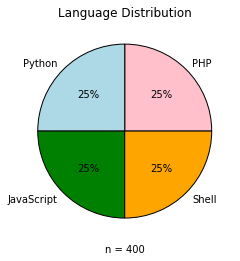

In [7]:
df.language.value_counts().plot.pie(
    colors = ['pink', 'lightblue', 'green', 'orange'], autopct = '%.0f%%')
plt.title("Language Distribution")
plt.ylabel("")
plt.xlabel('n = %d' % df.shape[0])

pd.concat(
    [df.language.value_counts(), df.language.value_counts(normalize = True)], axis = 1).set_axis(["n", "percent"], axis = 1, inplace = False)

**Note:** join all Readme and find high count of all words

In [8]:
pd.Series(" ".join(lemmas_df.lemmatized).split()).value_counts().head(10)

react     6312
native    5929
io        3531
img       3496
use       2940
source    2883
href      2724
src       2653
master    2585
svg       2579
dtype: int64

**Note:** words within each language

In [9]:
all_words = ' '.join(lemmas_df.lemmatized).split()

python_words = ' '.join(lemmas_df[lemmas_df.language == 'Python'].lemmatized).split()

javascript_words = ' '.join(lemmas_df[lemmas_df.language == 'JavaScript'].lemmatized).split()

php_words = ' '.join(lemmas_df[lemmas_df.language == 'PHP'].lemmatized).split()

shell_words = ' '.join(lemmas_df[lemmas_df.language == 'Shell'].lemmatized).split()

- Once we have a list of words, we can transform it into a pandas Series, which we can then use to show us how often each of the words occurs.

In [10]:
all_freq = pd.Series(all_words).value_counts()

python_words_freq = pd.Series(python_words).value_counts()

javascript_words_freq = pd.Series(javascript_words).value_counts()

php_words_freq = pd.Series(php_words).value_counts()

shell_words_freq = pd.Series(shell_words).value_counts()

### Term Frequency

Generally, when you hear 'Term Frequency', it is referring to the number of documents in which a word appears. When we move on to computing TF-IDF, this basic definition of Term Frequency applies.

However, term frequency can be calculated in a number of ways, all of which reflect how frequently a word appears in a document.

Raw Count: This is simply the count of the number of occurances of each word.
Frequency: The number of times each word appears divided by the total number of words.
Augmented Frequency: The frequency of each word divided by the maximum frequency. This can help prevent bias towards larger documents.

In [11]:
raw_count = (
    pd.concat([all_freq, python_words_freq, javascript_words_freq, php_words_freq, shell_words_freq], axis=1, sort=True)
    .rename(columns={0: "All", 1: "Python", 2: "JavaScript", 3: "PHP", 4: "Shell"})
    .fillna(0)
    .apply(lambda col: col.astype(int))
)

In [12]:
raw_count.T

,aa,aaa,aaaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaac,aaaaaaaaaai,aaaaaaaad,aaaaaaaaecm,...,zythum,zyusth,zyzsdy,zz,zzan,zzh,zzxadi,zzxcodeformat,zzz,zzzm
All,29,5,2,1,2,1,1,1,1,1,...,1,1,2,6,1,2,2,2,2,2
Python,8,0,0,1,2,1,0,0,0,0,...,0,0,2,0,0,2,0,2,0,2
JavaScript,15,1,0,0,0,0,1,1,1,1,...,1,1,0,4,0,0,0,0,0,0
PHP,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
Shell,0,4,2,0,0,0,0,0,0,0,...,0,0,0,2,1,0,0,0,2,0


**Task** Find record that has &#9

In [13]:
raw_count.sort_values(by="All").tail(10)

,All,Python,JavaScript,PHP,Shell
svg,2579,352,1503,426,298
master,2585,1188,662,341,394
src,2653,327,1835,284,207
href,2724,259,1740,246,479
source,2883,1942,539,103,299
use,2940,772,848,507,813
img,3496,561,2143,402,390
io,3531,846,1880,401,404
native,5929,32,5861,10,26
react,6312,13,6259,35,5


- Most common words overall?
- Most common Python, JavaScript, PHP, Shell words?
- Any words that uniquely Python, JavaScript, PHP, Shell words?

Text(0.5, 1.0, '10 most common words')

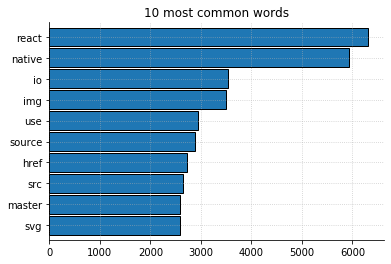

In [14]:
raw_count.sort_values(by='All')['All'].tail(10).plot.barh(width=.9)
plt.title('10 most common words')

Text(0.5, 1.0, '10 most common Python words')

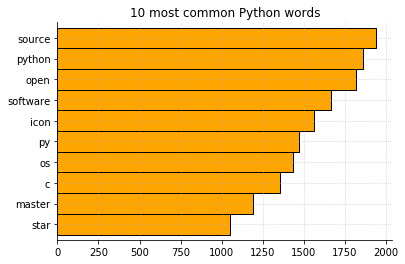

In [15]:
raw_count.sort_values(by='Python').Python.tail(10).plot.barh(width=1, color='Orange')
plt.title('10 most common Python words')

Text(0.5, 1.0, 'What are the most common JavaScript words')

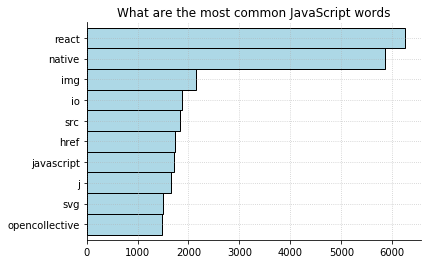

In [16]:
raw_count.sort_values(by='JavaScript').JavaScript.tail(10).plot.barh(width=1, color='lightblue')
plt.title('What are the most common JavaScript words')

Text(0.5, 1.0, 'What are the most common PHP words')

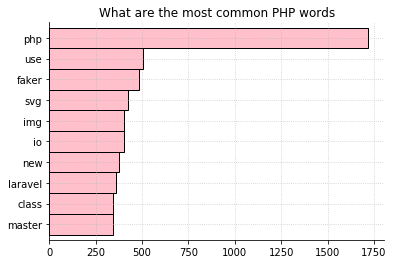

In [17]:
raw_count.sort_values(by='PHP').PHP.tail(10).plot.barh(width=1, color='pink')
plt.title('What are the most common PHP words')

Text(0.5, 1.0, 'What are the most common Shell words')

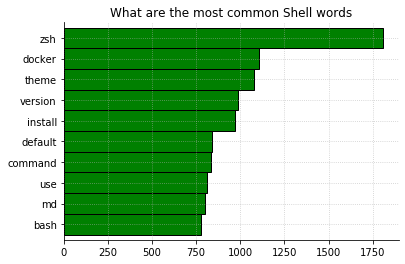

In [18]:
raw_count.sort_values(by='Shell').Shell.tail(10).plot.barh(width=1, color='green')
plt.title('What are the most common Shell words')

In [19]:
raw_count.head()

,All,Python,JavaScript,PHP,Shell
aa,29,8,15,6,0
aaa,5,0,1,0,4
aaaa,2,0,0,0,2
aaaaaaaaaaaa,1,1,0,0,0
aaaaaaaaaaaaaaaaaaaa,2,2,0,0,0


In [20]:
tf_df = raw_count[['All']];
tf_df = tf_df.rename(columns={'All': 'raw_count'})
tf_df = tf_df.assign(frequency = lambda lemmas_df: lemmas_df.raw_count / lemmas_df.raw_count.sum())
tf_df = tf_df.assign(augmented_frequency = lambda lemmas_df: lemmas_df.frequency / lemmas_df.frequency.max())
tf_df.frequency.max()

tf_df.sample()


,raw_count,frequency,augmented_frequency
detectam,2,0.000003,0.000317


### Ngrams

- Bigrams and visualizations of most frequent for all, Python, JavaScript, PHP, and Shell languages.

Text(0.5, 1.0, 'Bigrams for All Words')

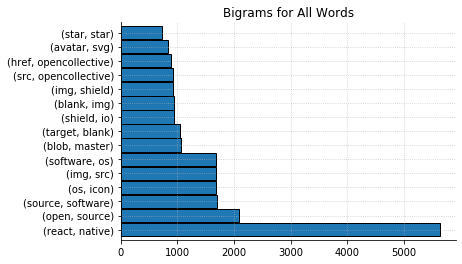

In [21]:
pd.Series(nltk.bigrams(all_words)).value_counts().head(15).plot.barh(width=.95).set_title('Bigrams for All Words')

Text(0.5, 1.0, 'Bigrams for Python Words')

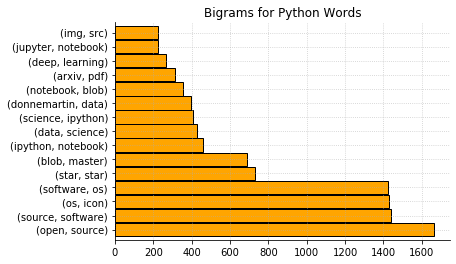

In [22]:
pd.Series(nltk.bigrams(python_words)).value_counts().head(15).plot.barh(width=.95, color='orange').set_title('Bigrams for Python Words')

Text(0.5, 1.0, 'Bigrams for JavaScript Words')

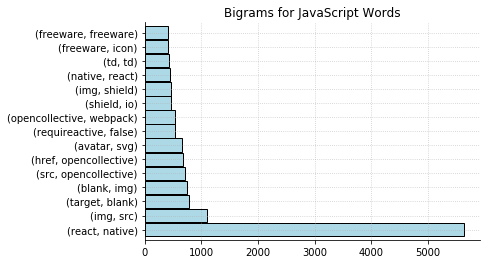

In [23]:
pd.Series(nltk.bigrams(javascript_words)).value_counts().head(15).plot.barh(width=.95, color='lightblue').set_title('Bigrams for JavaScript Words')

Text(0.5, 1.0, 'Bigrams for PHP Words')

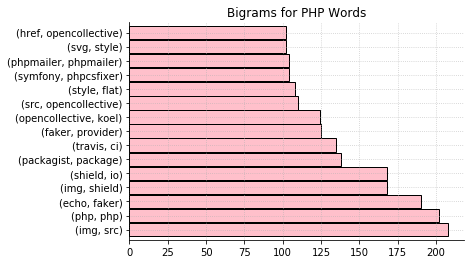

In [24]:
pd.Series(nltk.bigrams(php_words)).value_counts().head(15).plot.barh(width=.95, color='pink').set_title('Bigrams for PHP Words')

Text(0.5, 1.0, 'Bigrams for Shell Words')

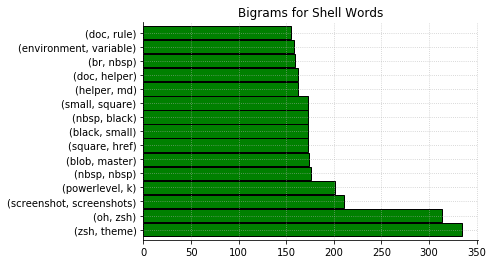

In [25]:
pd.Series(nltk.bigrams(shell_words)).value_counts().head(15).plot.barh(width=.95, color='green').set_title('Bigrams for Shell Words')

- Trigrams and visualizations of most frequent for all, Python, JavaScript, PHP, and Shell languages.

Text(0.5, 1.0, 'Trigrams for All Words')

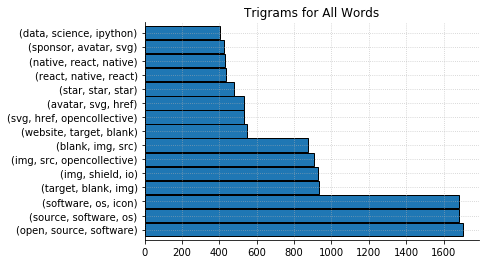

In [26]:
pd.Series(nltk.ngrams(all_words, 3)).value_counts().head(15).plot.barh(width=.95).set_title('Trigrams for All Words')

Text(0.5, 1.0, 'Trigrams for Python Words')

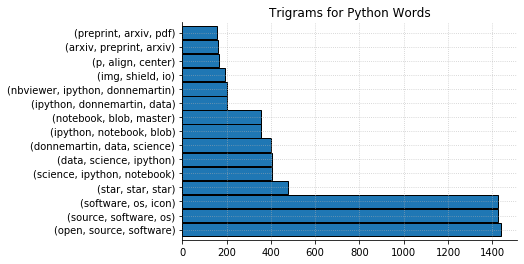

In [27]:
pd.Series(nltk.ngrams(python_words, 3)).value_counts().head(15).plot.barh(width=.95).set_title('Trigrams for Python Words')

Text(0.5, 1.0, 'Trigrams for JavaScript Words')

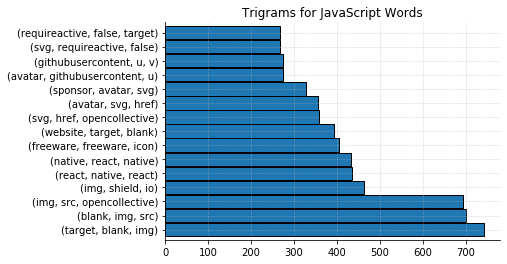

In [28]:
pd.Series(nltk.ngrams(javascript_words, 3)).value_counts().head(15).plot.barh(width=.95).set_title('Trigrams for JavaScript Words')

Text(0.5, 1.0, 'Trigrams for PHP Words')

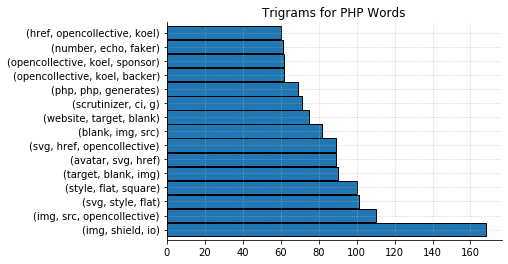

In [29]:
pd.Series(nltk.ngrams(php_words, 3)).value_counts().head(15).plot.barh(width=.95).set_title('Trigrams for PHP Words')

Text(0.5, 1.0, 'Trigrams for Shell Words')

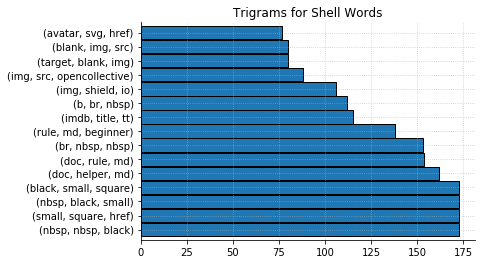

In [30]:
pd.Series(nltk.ngrams(shell_words, 3)).value_counts().head(15).plot.barh(width=.95).set_title('Trigrams for Shell Words')

### Document Length

In [31]:
lemmas_df["length"] = lemmas_df.lemmatized.apply(len)
lemmas_df.drop(index = lemmas_df[lemmas_df.length > 140000].index, inplace = True)

Text(0.5, 1.0, 'Document Length')

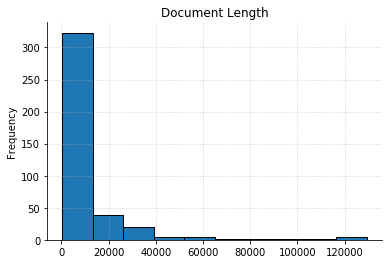

In [32]:
lemmas_df.length.plot.hist().set_title('Document Length')

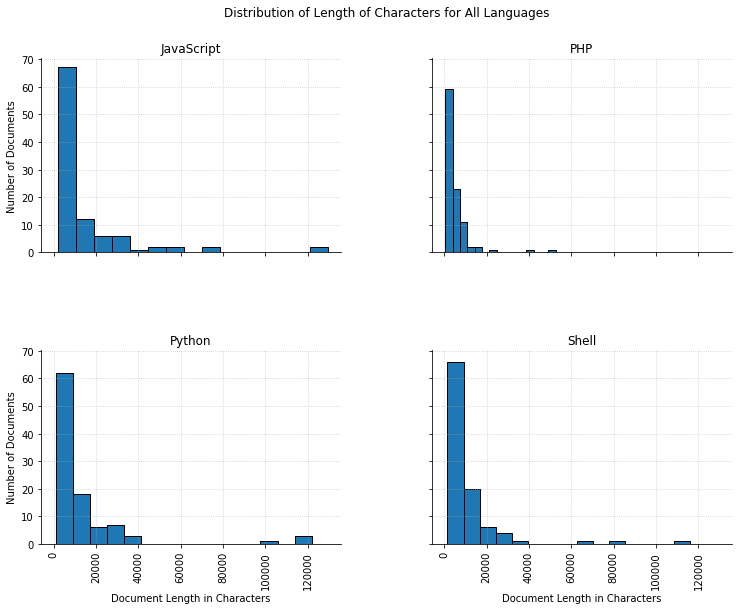

In [33]:
ar = lemmas_df.hist("length", by="language", sharex=True, sharey = True, layout=(2, 2), bins=15, figsize=(12, 9))
plt.suptitle('Distribution of Length of Characters for All Languages')

for ax in ar.flatten():
    ax.set_xlabel('Document Length in Characters')
    ax.set_ylabel('Number of Documents')
    ax.set

Text(0.5, 0, 'Length in Characters')

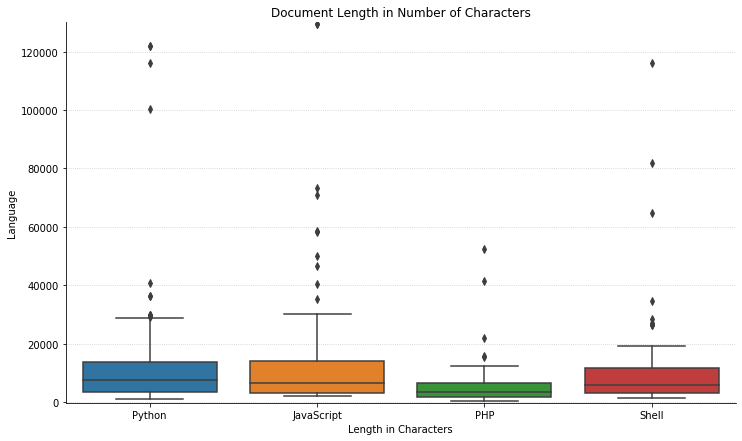

In [34]:
fig = plt.figure(figsize=(12, 7))

ax = sns.boxplot(data=lemmas_df, y="length", x="language")
ax.set_title('Document Length in Number of Characters')
ax.set_ylabel('Language')
ax.margins(.005) 
ax.set_xlabel('Length in Characters')

### Number of Words

In [35]:
lemmas_df["n_words"] = lemmas_df.lemmatized.str.count(r"\w+")

In [36]:
lemmas_df.groupby("language").n_words.describe()

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
JavaScript,100.0,2121.71,3158.797292,333.0,485.00,942.0,1997.00,18256.0
PHP,100.0,728.82,998.429933,60.0,230.25,478.0,914.50,7202.0
Python,100.0,2058.59,3216.770719,176.0,540.00,1073.0,2279.75,17444.0
Shell,100.0,1569.35,2319.130686,235.0,486.00,889.5,1697.50,16737.0


Text(0.5, 1.0, 'Document Length in Number of Words')

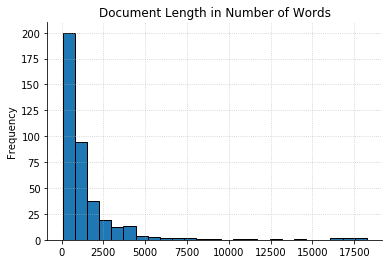

In [37]:
lemmas_df.n_words.plot.hist(bins = 25).set_title('Document Length in Number of Words')

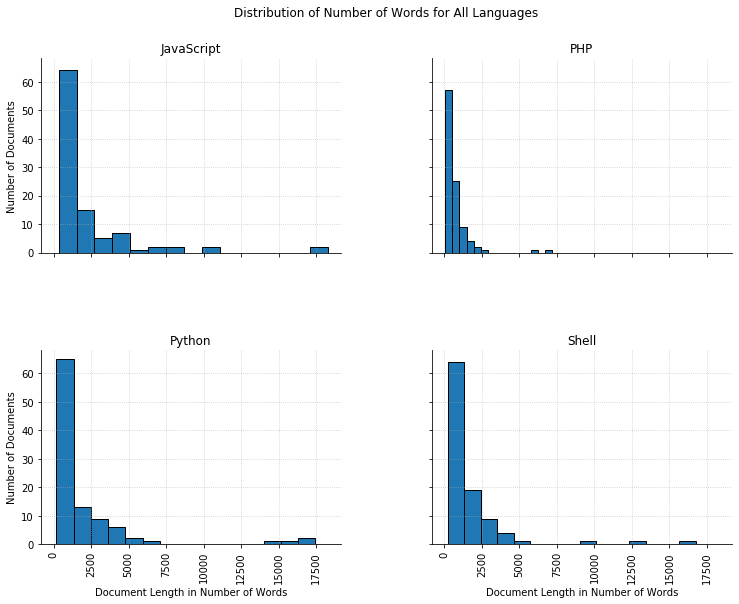

In [38]:
ar = lemmas_df.hist("n_words", by="language", sharex=True, sharey = True, layout=(2, 2), bins=15, figsize=(12, 9))
plt.suptitle("Distribution of Number of Words for All Languages")

for ax in ar.flatten():
    ax.set_xlabel('Document Length in Number of Words')
    ax.set_ylabel('Number of Documents')

### Word Cloud

- WordCloud with all words

(-0.5, 1499.5, 999.5, -0.5)

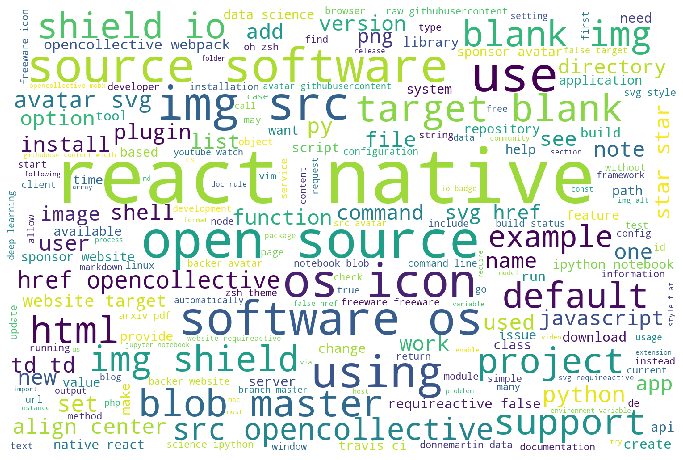

In [39]:
corpus = ' '.join(all_words)

plt.figure(figsize=(12,12))
img = WordCloud(background_color="white", height=1000, width=1500, random_state=123).generate(corpus)
plt.imshow(img)
plt.axis("off")

- WordCloud with all words by languages

In [40]:
python_corpus = ' '.join(python_words)
javascript_corpus = ' '.join(javascript_words)
php_corpus = ' '.join(php_words)
shell_corpus = ' '.join(shell_words)

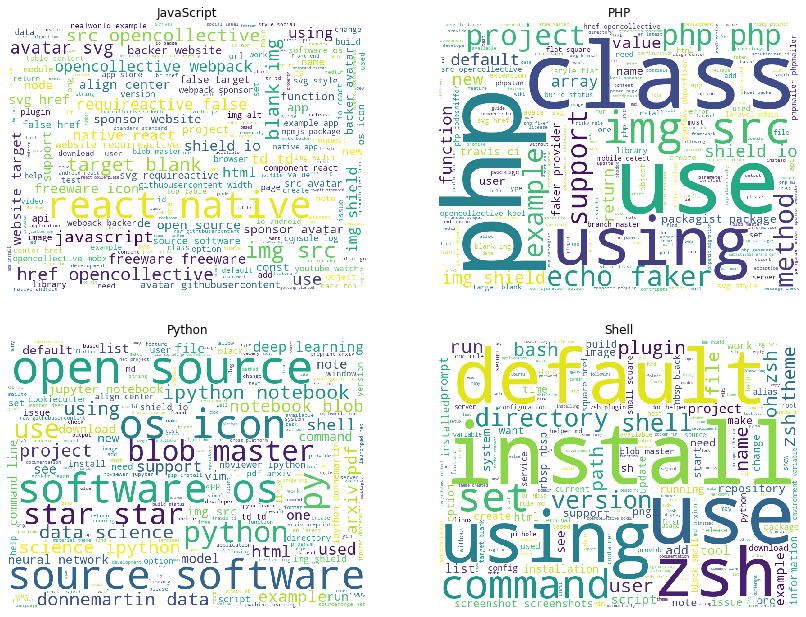

In [41]:
python_cloud = WordCloud(background_color="white", height=600, width=800).generate(
    " ".join(python_words)
)
javascript_cloud = WordCloud(background_color="white", height=600, width=800).generate(
    " ".join(javascript_words)
)
php_cloud = WordCloud(background_color="white", height=600, width=800).generate(
    " ".join(php_words)
)
shell_cloud = WordCloud(background_color="white", height=600, width=800).generate(
    " ".join(shell_words)
)

plt.figure(figsize=(10, 8))
axs = [
    plt.axes([0, 0, 0.5, 0.5]),
    plt.axes([0, 0.55, 0.5, .5]),
    plt.axes([0.6, 0.55, 0.5, 0.5]),
    plt.axes([0.6, 0, 0.5, 0.5]),
]

axs[0].imshow(python_cloud)
axs[1].imshow(javascript_cloud)
axs[2].imshow(php_cloud)
axs[3].imshow(shell_cloud)

axs[0].set_title("Python")
axs[1].set_title("JavaScript")
axs[2].set_title("PHP")
axs[3].set_title("Shell")

for ax in axs:
    ax.axis("off")    

### Word Cloud with Bigrams

Text(0.5, 1.0, 'Top 15 Bigrams Word Cloud with All Words')

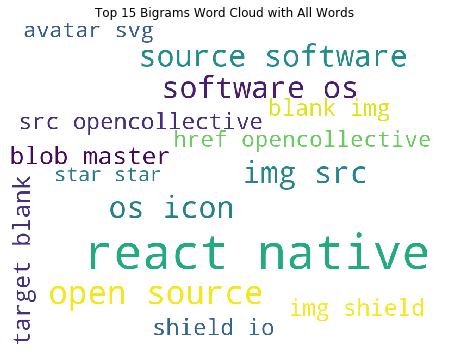

In [42]:
all_bigrams = pd.Series(nltk.bigrams(all_words)).value_counts().head(15)

all_data = {p1 + " " + p2: v for (p1, p2), v in all_bigrams.to_dict().items()}

img = WordCloud(background_color="white", height=600, width=800).generate_from_frequencies(all_data)
plt.figure(figsize=(9, 6))
plt.imshow(img)
plt.axis("off")
plt.title('Top 15 Bigrams Word Cloud with All Words')

Text(0.5, 1.0, 'Top 15 Bigrams Word Cloud with Python Words')

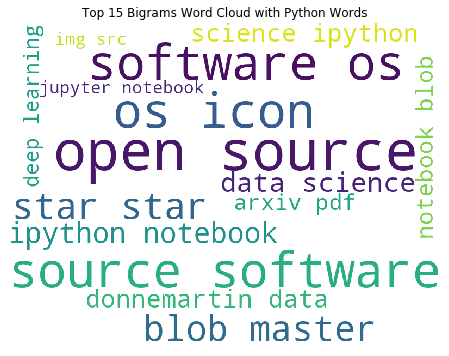

In [43]:
python_bigrams = pd.Series(nltk.bigrams(python_words)).value_counts().head(15)

python_data = {p1 + " " + p2: v for (p1, p2), v in python_bigrams.to_dict().items()}

img = WordCloud(background_color="white", height=600, width=800).generate_from_frequencies(python_data)
plt.figure(figsize=(9, 6))
plt.imshow(img)
plt.axis("off")
plt.title('Top 15 Bigrams Word Cloud with Python Words')

Text(0.5, 1.0, 'Top 15 Bigrams Word Cloud with JavaScript Words')

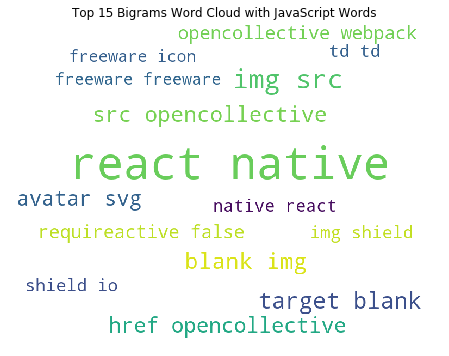

In [44]:
javascript_bigrams = pd.Series(nltk.bigrams(javascript_words)).value_counts().head(15)

javascript_data = {p1 + " " + p2: v for (p1, p2), v in javascript_bigrams.to_dict().items()}

img = WordCloud(background_color="white", height=600, width=800).generate_from_frequencies(javascript_data)
plt.figure(figsize=(9, 6))
plt.imshow(img)
plt.axis("off")
plt.title('Top 15 Bigrams Word Cloud with JavaScript Words')

Text(0.5, 1.0, 'Top 15 Bigrams Word Cloud with PHP Words')

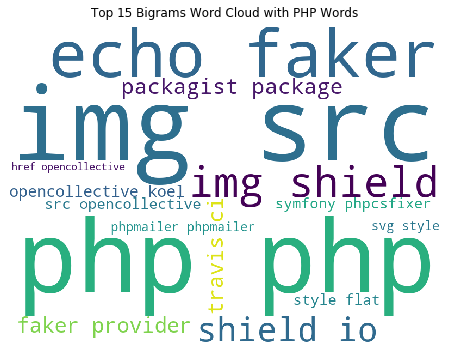

In [45]:
php_bigrams = pd.Series(nltk.bigrams(php_words)).value_counts().head(15)

php_data = {p1 + " " + p2: v for (p1, p2), v in php_bigrams.to_dict().items()}

img = WordCloud(background_color="white", height=600, width=800).generate_from_frequencies(php_data)
plt.figure(figsize=(9, 6))
plt.imshow(img)
plt.axis("off")
plt.title('Top 15 Bigrams Word Cloud with PHP Words')

Text(0.5, 1.0, 'Top 15 Bigrams Word Cloud with Shell Words')

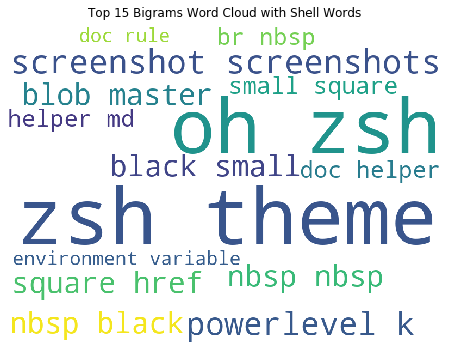

In [46]:
shell_bigrams = pd.Series(nltk.bigrams(shell_words)).value_counts().head(15)

shell_data = {p1 + " " + p2: v for (p1, p2), v in shell_bigrams.to_dict().items()}

img = WordCloud(background_color="white", height=600, width=800).generate_from_frequencies(shell_data)
plt.figure(figsize=(9, 6))
plt.imshow(img)
plt.axis("off")
plt.title('Top 15 Bigrams Word Cloud with Shell Words')

### Word Cloud with Trigrams

Text(0.5, 1.0, 'Top 15 Trigrams with All Words')

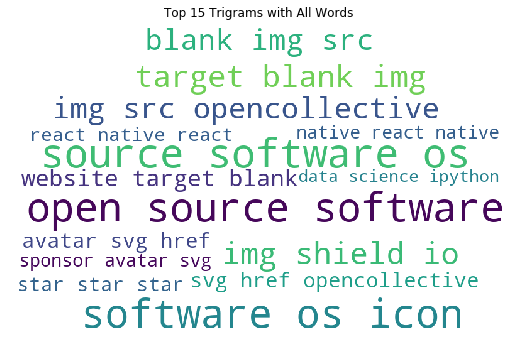

In [47]:
all_trigrams = pd.Series(nltk.ngrams(all_words, 3)).value_counts().head(15)

data = {p1 + " " + p2 + " " + p3: v for (p1, p2, p3), v in all_trigrams.to_dict().items()}

frequencies = data

img = WordCloud(background_color="white", height=500, width=800).generate_from_frequencies(data)
plt.figure(figsize=(9, 6))
plt.imshow(img)
plt.axis("off")
plt.title('Top 15 Trigrams with All Words')

Text(0.5, 1.0, 'Top 15 Trigrams with Python Words')

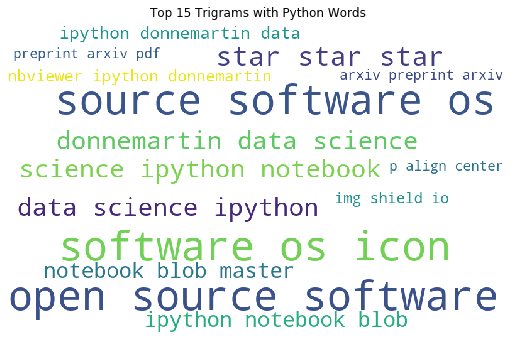

In [48]:
python_trigrams = pd.Series(nltk.ngrams(python_words, 3)).value_counts().head(15)

data = {p1 + " " + p2 + " " + p3: v for (p1, p2, p3), v in python_trigrams.to_dict().items()}

frequencies = data

img = WordCloud(background_color="white", height=500, width=800).generate_from_frequencies(data)
plt.figure(figsize=(9, 6))
plt.imshow(img)
plt.axis("off")
plt.title('Top 15 Trigrams with Python Words')

Text(0.5, 1.0, 'Top 15 Trigrams with JavaScript Words')

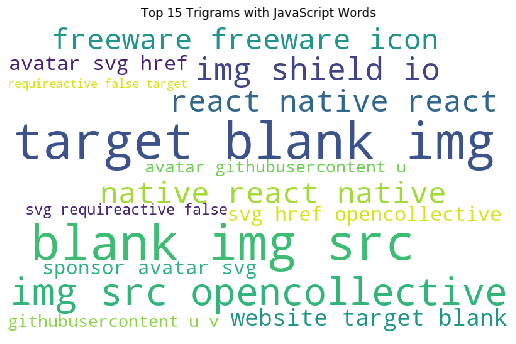

In [49]:
javascript_trigrams = pd.Series(nltk.ngrams(javascript_words, 3)).value_counts().head(15)

data = {p1 + " " + p2 + " " + p3: v for (p1, p2, p3), v in javascript_trigrams.to_dict().items()}

frequencies = data

img = WordCloud(background_color="white", height=500, width=800).generate_from_frequencies(data)
plt.figure(figsize=(9, 6))
plt.imshow(img)
plt.axis("off")
plt.title('Top 15 Trigrams with JavaScript Words')

Text(0.5, 1.0, 'Top 15 Trigrams with PHP Words')

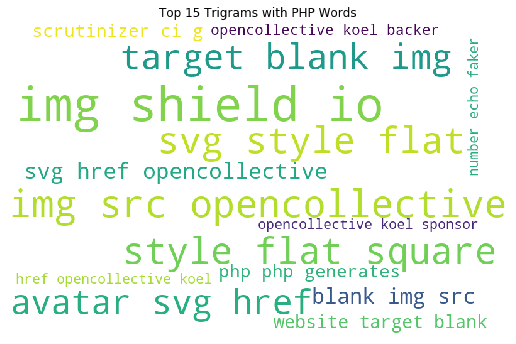

In [50]:
php_trigrams = pd.Series(nltk.ngrams(php_words, 3)).value_counts().head(15)

data = {p1 + " " + p2 + " " + p3: v for (p1, p2, p3), v in php_trigrams.to_dict().items()}

frequencies = data

img = WordCloud(background_color="white", height=500, width=800).generate_from_frequencies(data)
plt.figure(figsize=(9, 6))
plt.imshow(img)
plt.axis("off")
plt.title('Top 15 Trigrams with PHP Words')

Text(0.5, 1.0, 'Top 15 Trigrams with Shell Words')

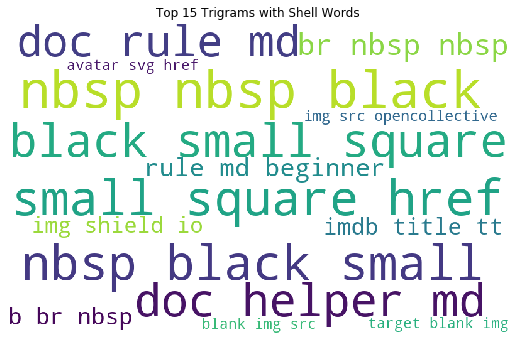

In [51]:
shell_trigrams = pd.Series(nltk.ngrams(shell_words, 3)).value_counts().head(15)

data = {p1 + " " + p2 + " " + p3: v for (p1, p2, p3), v in shell_trigrams.to_dict().items()}

frequencies = data

img = WordCloud(background_color="white", height=500, width=800).generate_from_frequencies(data)
plt.figure(figsize=(9, 6))
plt.imshow(img)
plt.axis("off")
plt.title('Top 15 Trigrams with Shell Words')